In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
df = pd.read_csv('euro2024_players.csv')
df.sample(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
105,Unai Simón,Goalkeeper,26,Athletic Bilbao,190,right,39,0,30000000,Spain
604,David Zima,Centre-Back,23,SK Slavia Prague,192,right,20,1,4000000,Czech Republic
370,Maximilian Wöber,Centre-Back,26,Borussia Mönchengladbach,188,left,23,0,10000000,Austria
45,Kenny McLean,Central Midfield,32,Norwich City,180,left,32,2,900000,Scotland
368,Kevin Danso,Centre-Back,25,RC Lens,190,right,18,0,25000000,Austria
351,Joey Veerman,Central Midfield,25,PSV Eindhoven,185,right,9,1,40000000,Netherlands
469,Florin Niță,Goalkeeper,36,Gaziantep FK,184,right,21,0,225000,Romania
500,Oleksandr Svatok,Centre-Back,29,SK Dnipro-1,186,right,6,0,2000000,Ukraine
599,Jindrich Stanek,Goalkeeper,28,SK Slavia Prague,192,right,9,0,3500000,Czech Republic
275,Mathias Jensen,Central Midfield,28,Brentford FC,180,right,30,1,28000000,Denmark


In [34]:
df.head(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
5,Antonio Rüdiger,Centre-Back,31,Real Madrid,190,right,69,3,25000000,Germany
6,Waldemar Anton,Centre-Back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,Centre-Back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
8,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
9,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany


In [35]:
df.tail()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [37]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,623.0,2.704013e+01,4.124275e+00,16.0,24.0,27.0,30.0,41.0
Height,623.0,1.841814e+02,6.569258e+00,167.0,180.0,185.0,189.0,202.0
Caps,623.0,3.033868e+01,3.098790e+01,0.0,7.0,21.0,42.0,206.0
Goals,623.0,4.152488e+00,1.008680e+01,0.0,0.0,1.0,4.0,128.0
MarketValue,623.0,1.840903e+07,2.426195e+07,50000.0,2900000.0,9000000.0,25000000.0,180000000.0


<Axes: >

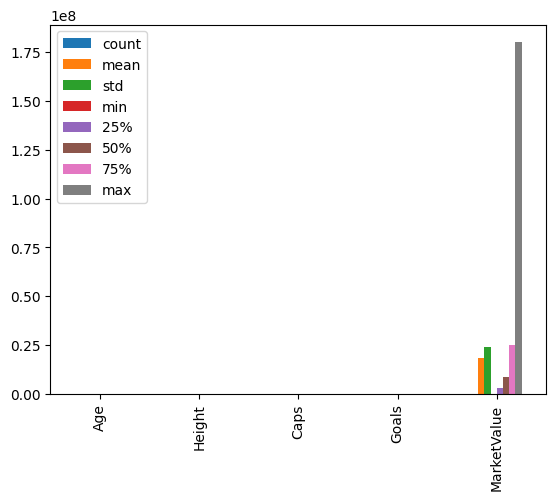

In [38]:
df.describe().T.plot(kind='bar')

In [39]:
df.shape

(623, 10)

In [40]:
df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [41]:
df.duplicated().sum()

0

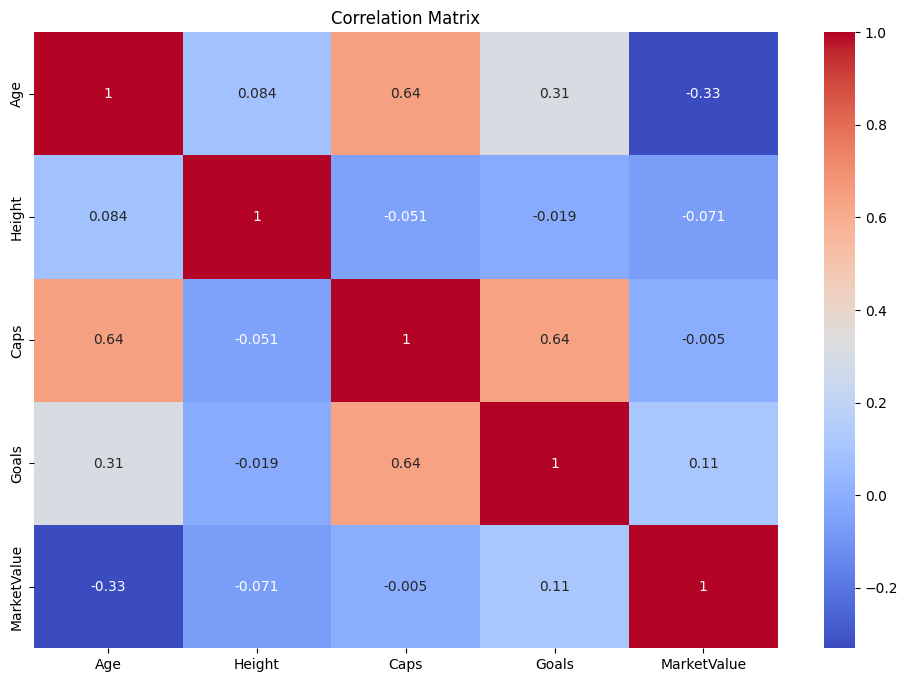

In [42]:
numeric_cols = df.select_dtypes(include=np.number).columns  # Pilih kolom numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.columns.to_list()

['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']

In [44]:
portugal_data = df[df['Country'] == "Portugal"]
print(portugal_data)

                    Name            Position  Age                     Club  \
571          Diogo Costa          Goalkeeper   24                 FC Porto   
572              José Sá          Goalkeeper   31  Wolverhampton Wanderers   
573         Rui Patrício          Goalkeeper   36                  AS Roma   
574           Rúben Dias         Centre-Back   27          Manchester City   
575       Gonçalo Inácio         Centre-Back   22              Sporting CP   
576        António Silva         Centre-Back   20               SL Benfica   
577                 Pepe         Centre-Back   41                 FC Porto   
578          Nuno Mendes           Left-Back   21      Paris Saint-Germain   
579          Diogo Dalot          Right-Back   25        Manchester United   
580         João Cancelo          Right-Back   30             FC Barcelona   
581        Nélson Semedo          Right-Back   30  Wolverhampton Wanderers   
582        João Palhinha  Defensive Midfield   28               

Text(0.5, 1.0, 'Number of Players per Position')

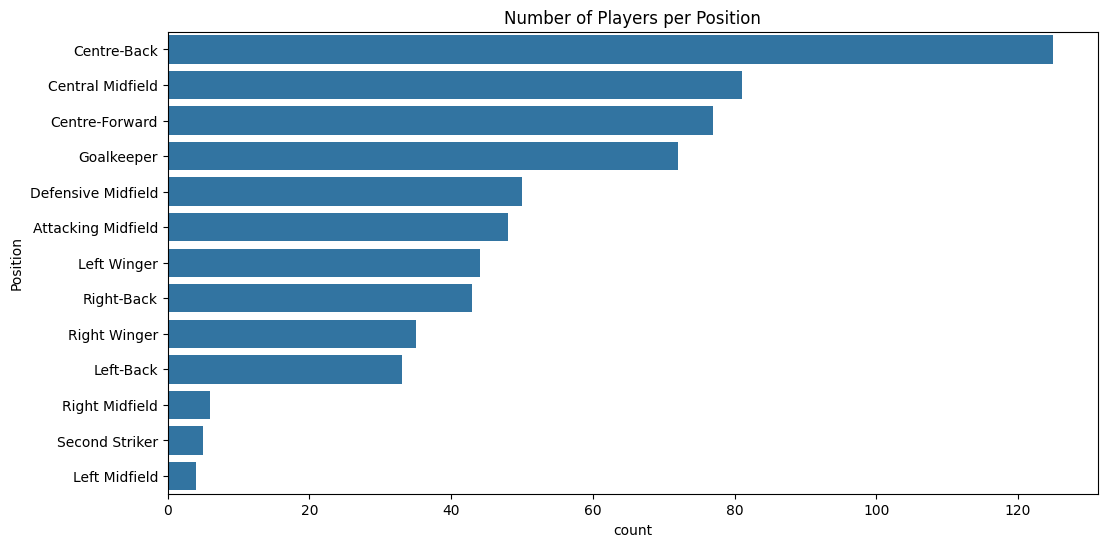

In [45]:
# Bar chart - Players per position
plt.figure(figsize=(12,6))
sns.countplot(y='Position', data=df, order=df['Position'].value_counts().index)
plt.title('Number of Players per Position')

In [46]:
most_goals = df['Goals'].idxmax()
player_most_goals = df.loc[most_goals]

print("Player with the most goals:")
print(player_most_goals)

Player with the most goals:
Name           Cristiano Ronaldo
Position          Centre-Forward
Age                           39
Club                 Al-Nassr FC
Height                       188
Foot                       right
Caps                         206
Goals                        128
MarketValue             15000000
Country                 Portugal
Name: 596, dtype: object


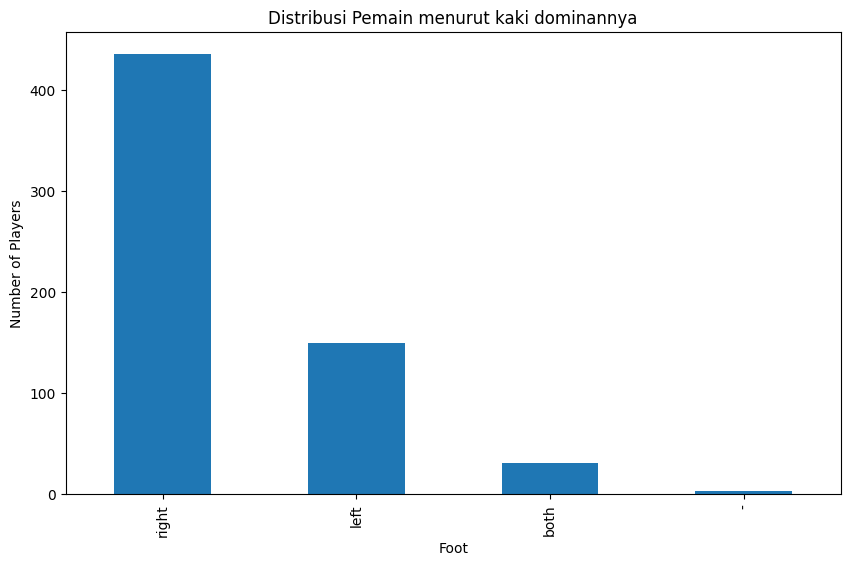

In [47]:
foot = df['Foot'].value_counts()
plt.figure(figsize=(10, 6))
foot.plot(kind='bar')
plt.title('Distribusi Pemain menurut kaki dominannya')
plt.xlabel('Foot')
plt.ylabel('Number of Players')
plt.show()


<ipython-input-48-5ab02b12aec6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




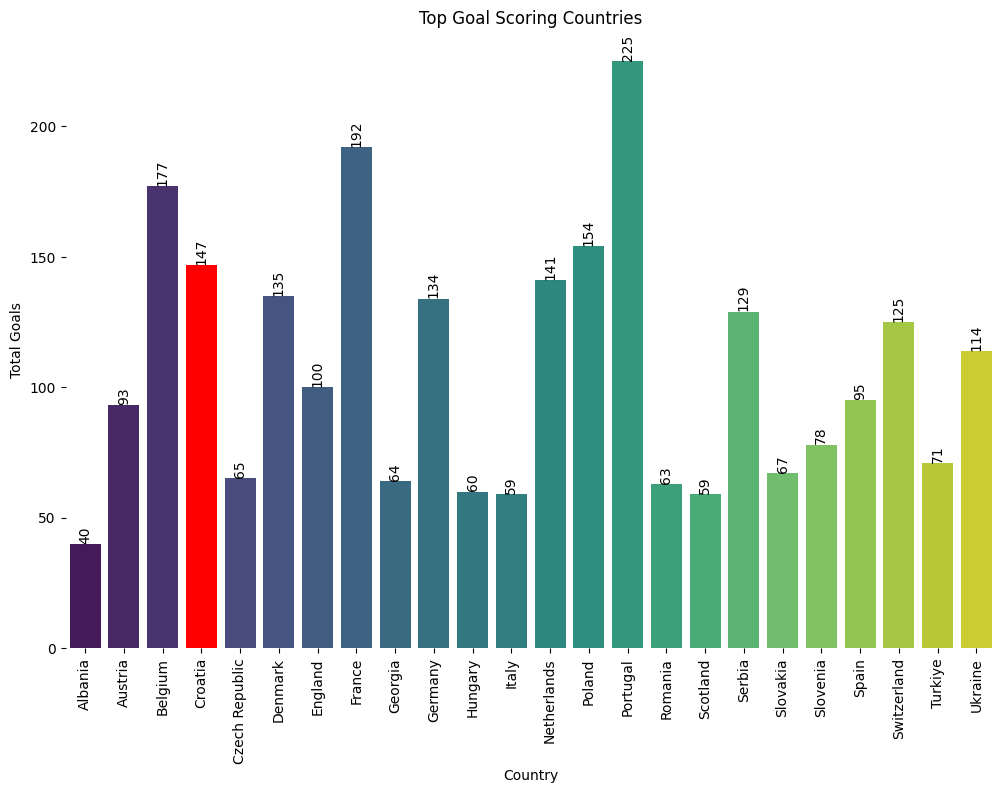

In [48]:
# Summarize goals and caps by country
summary_by_country = df.groupby('Country').agg({'Goals': 'sum', 'Caps': 'sum'}).reset_index()

# Find the country with the maximum Caps
top_caps_country = summary_by_country.loc[summary_by_country['Caps'].idxmax()]

# # Plotting the bar chart vertically
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Country', y='Goals', data=summary_by_country, palette='viridis')

# Displaying the values on each bar
for i, (country, value) in enumerate(zip(summary_by_country['Country'], summary_by_country['Goals'])):
    bar_plot.text(i, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Highlighting the country with the most Caps
for i in range(len(summary_by_country)):
    if summary_by_country.iloc[i]['Country'] == top_caps_country['Country']:
        bar_plot.patches[i].set_facecolor('red')

# Adding title and labels
plt.title('Top Goal Scoring Countries')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)

# Removing unnecessary spines
sns.despine(left=True, bottom=True)

# Displaying the plot
plt.show()

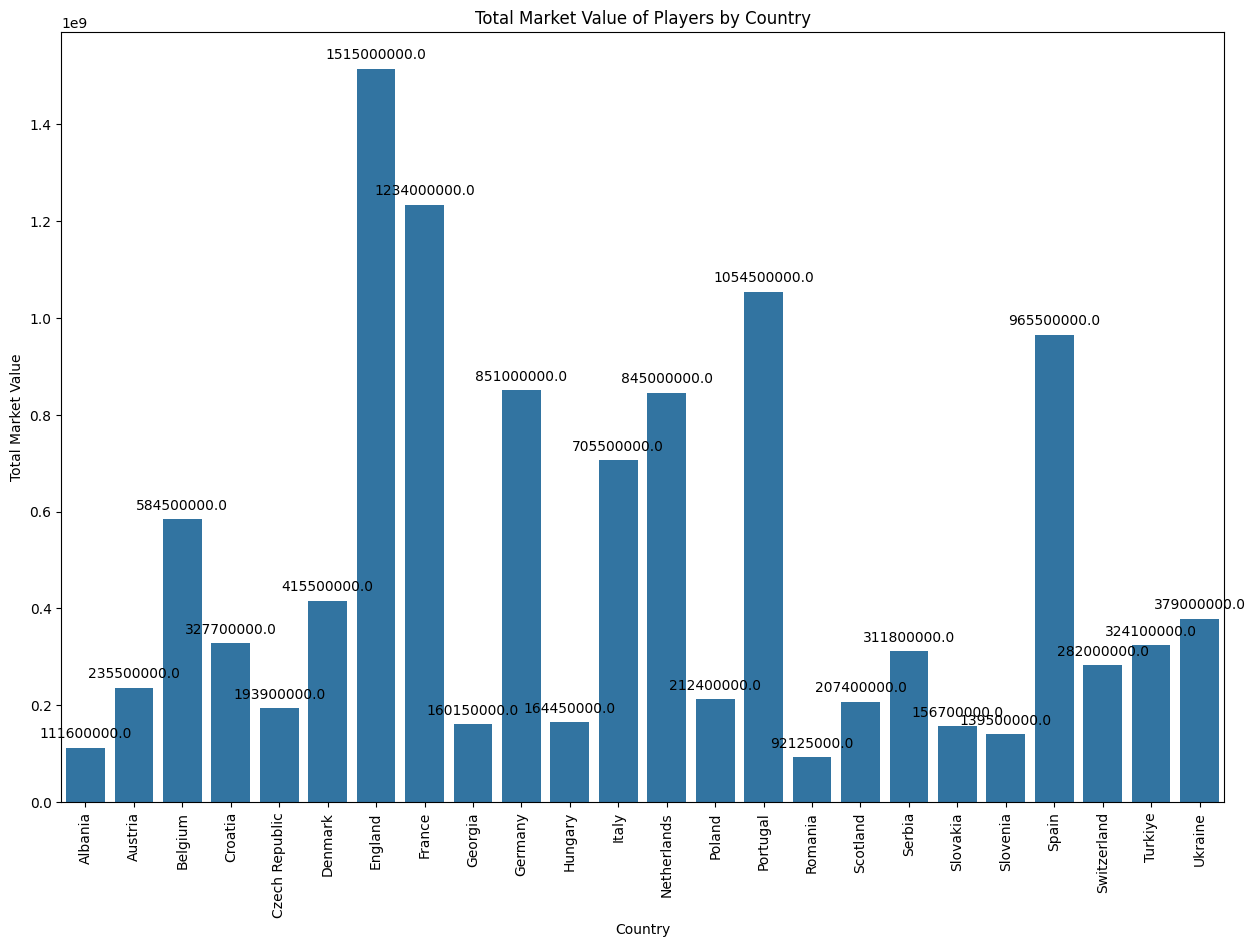

In [49]:
# Siapkan data yang dikumpulkan berdasarkan negara
df_grouped = df.groupby('Country').sum().reset_index()

# Mengatur ukuran bentuk untuk grafik
plt.figure(figsize=(15, 10))

# Buat grafik batang untuk menampilkan nilai pasar pemain berdasarkan negara
goalplot2 = sns.barplot(x='Country', y='MarketValue', data=df_grouped)
plt.title('Total Market Value of Players by Country')
plt.xlabel('Country')
plt.ylabel('Total Market Value')

# Tambahkan label nomor ke kolom
for p in goalplot2.patches:
    goalplot2.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

   # Tampilkan grafik
plt.xticks(rotation=90)  # Putar nama negara untuk menghindari tumpang tindih
plt.show()

Total Market value pemain di 10 club

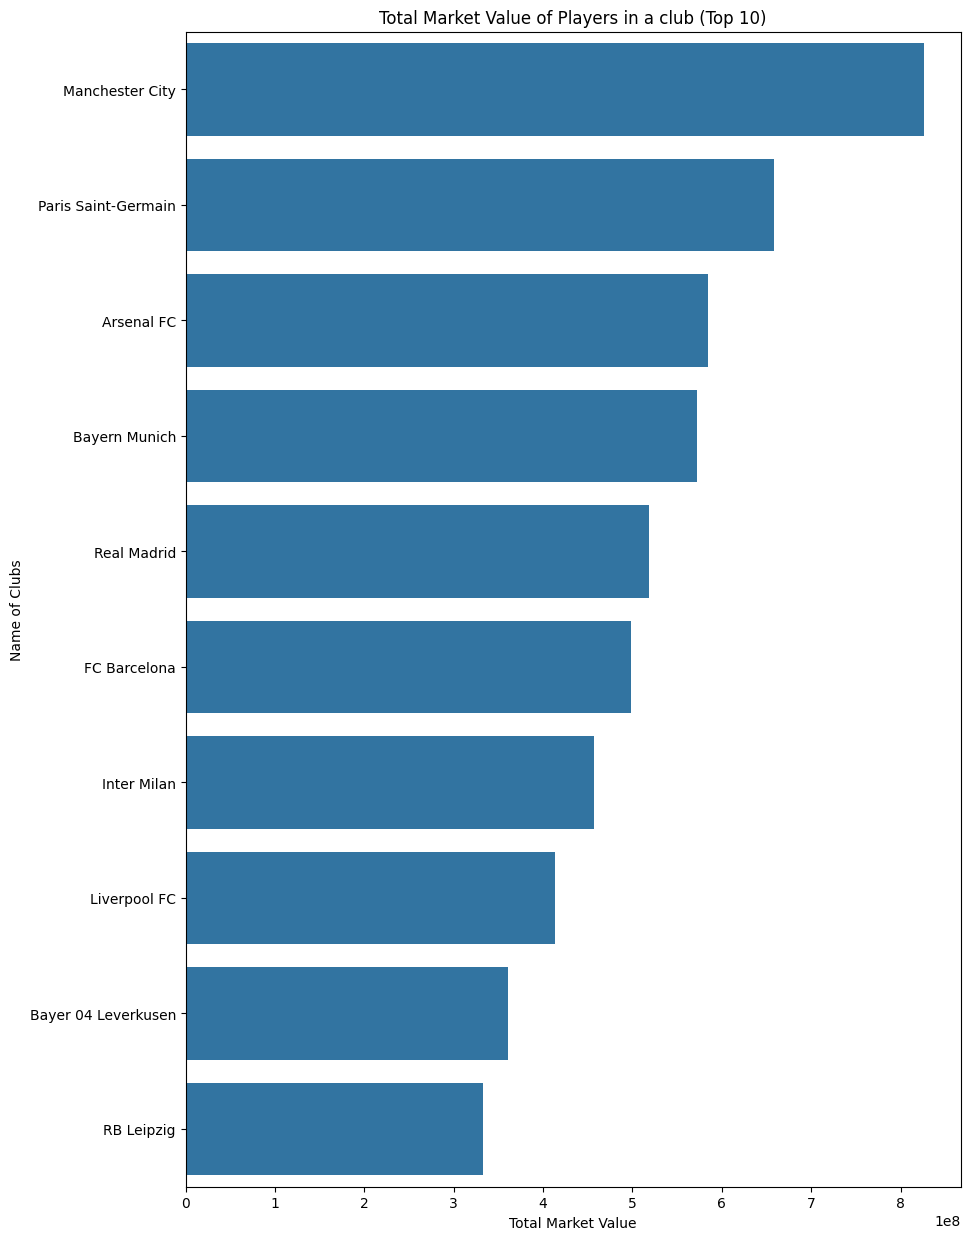

In [50]:
data_group = df.groupby('Club').sum().reset_index()
top_10_clubs = data_group.sort_values(by='MarketValue', ascending=False).head(10)
plt.figure(figsize=(10, 15))
sns.barplot(x='MarketValue',y='Club',data = top_10_clubs)
plt.title('Total Market Value of Players in a club (Top 10)')
plt.xlabel('Total Market Value')
plt.ylabel('Name of Clubs')
plt.show()


In [51]:
from plotly import express

for column in ['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']:
    express.histogram(data_frame=df, x=column).show()

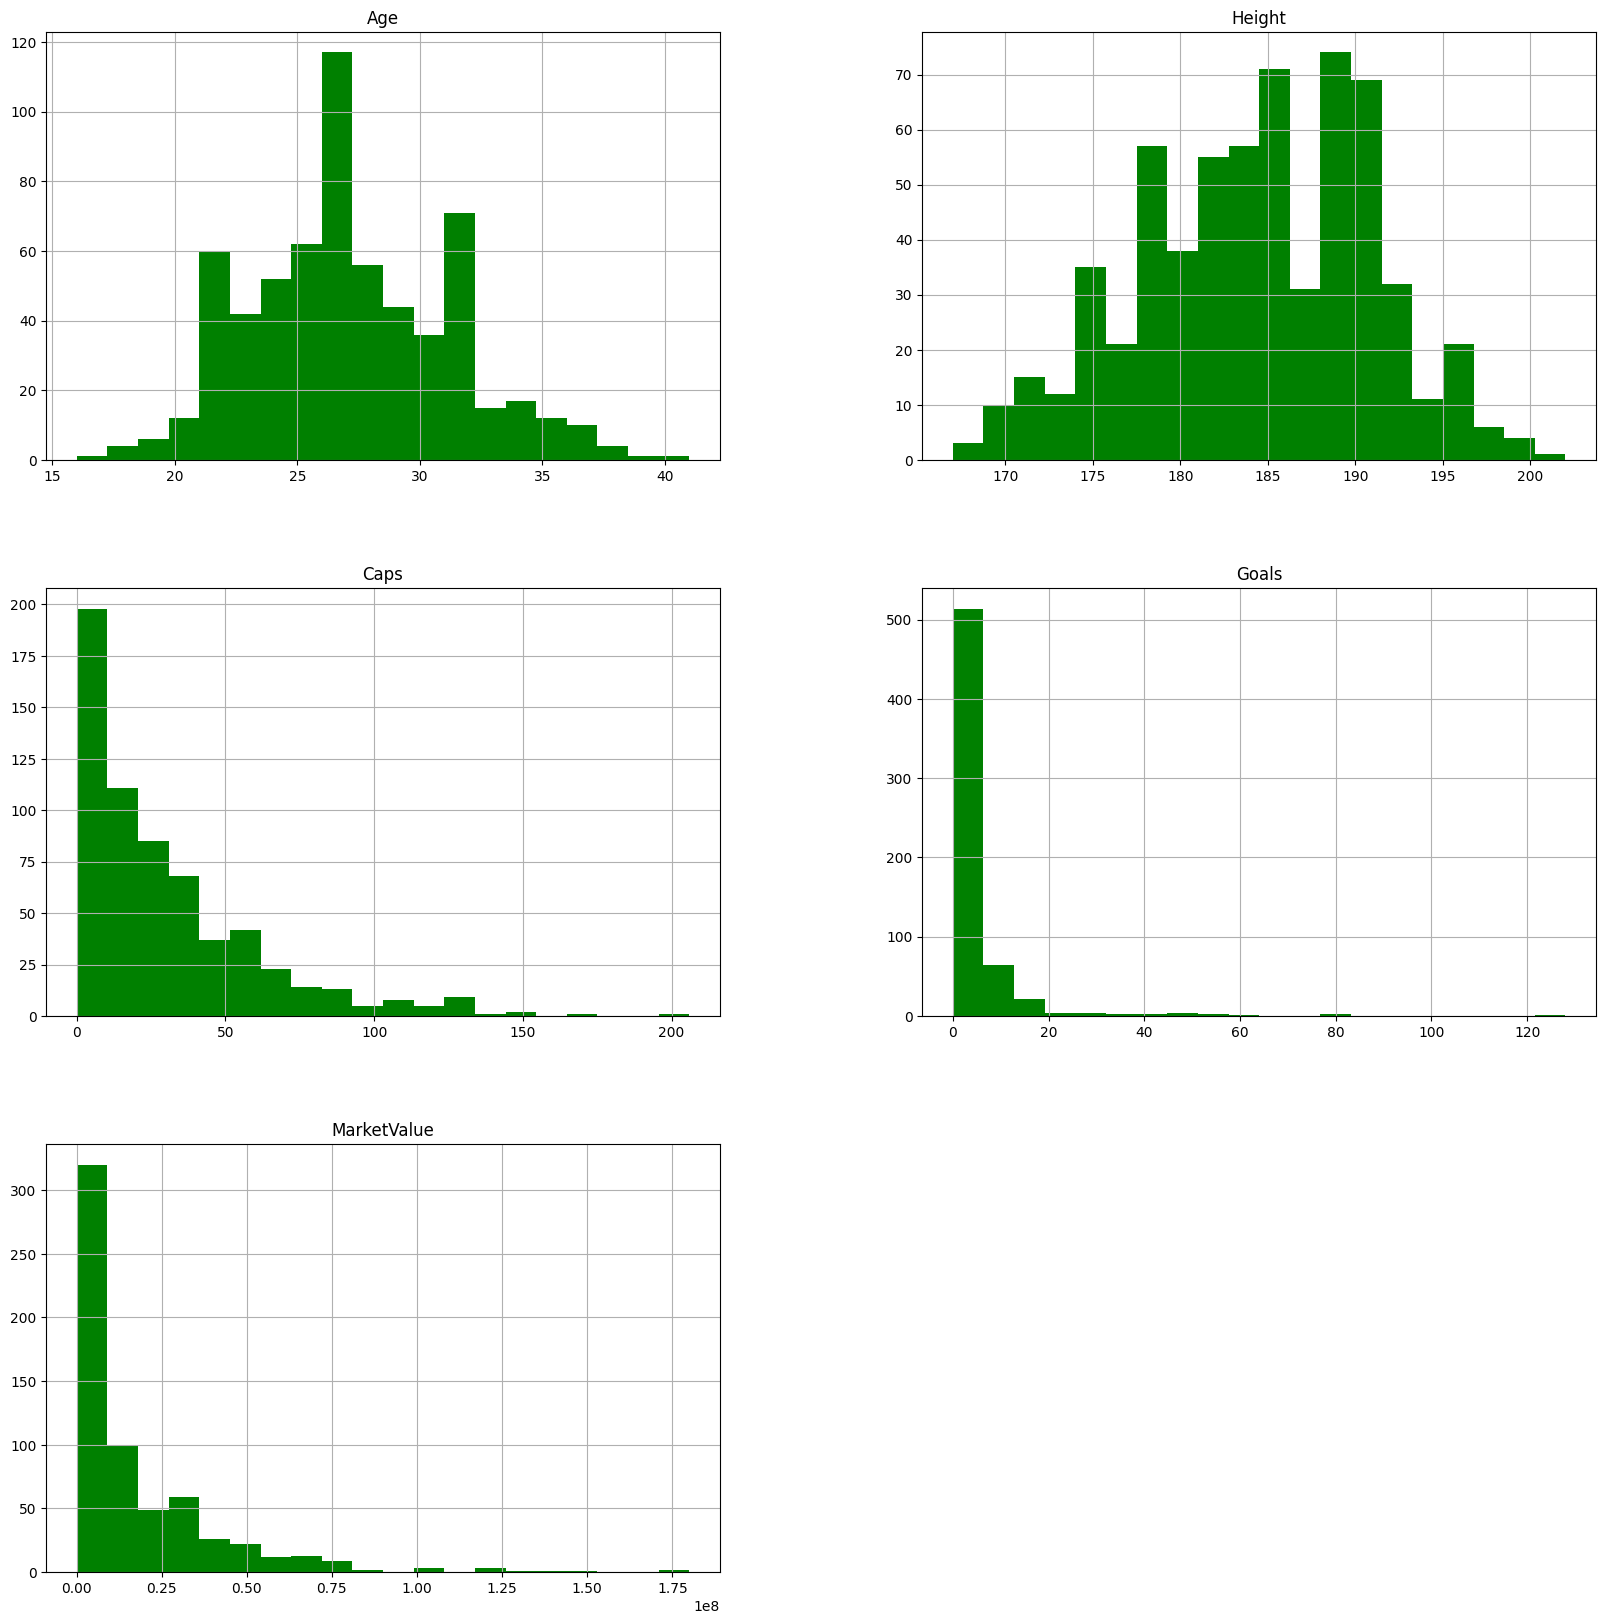

In [52]:
df.hist(bins = 20, figsize = (20,20), color = 'g')
plt.show()

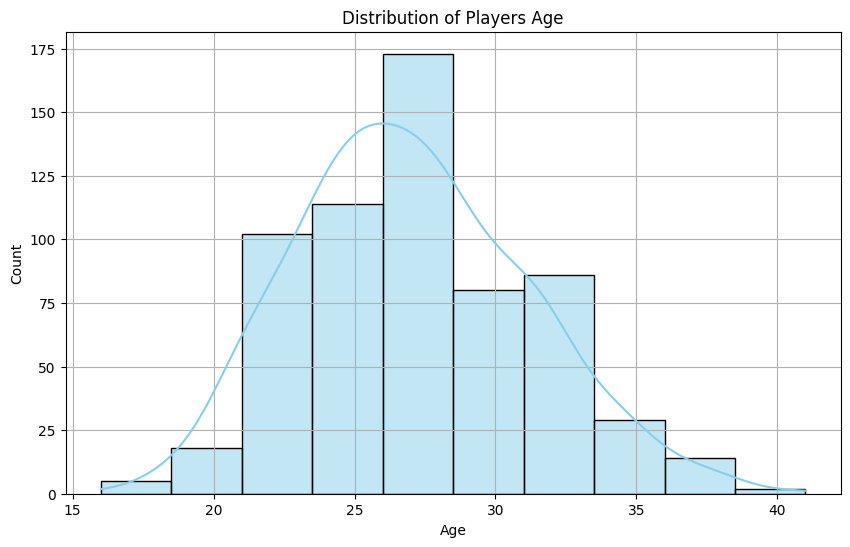

In [53]:
# Players by age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Players Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

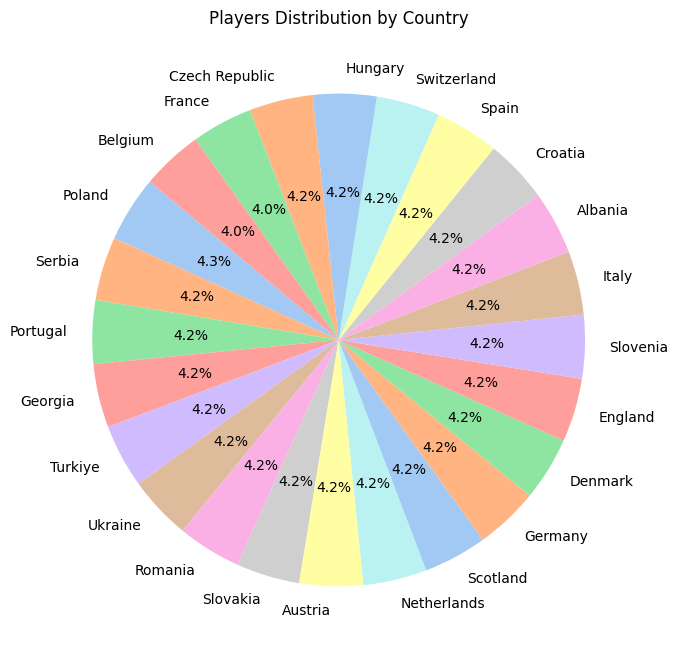

In [54]:
# Pie chart: Players by country
plt.figure(figsize=(8, 8))
country_counts = df['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Players Distribution by Country')
plt.show()

<ipython-input-59-d84ab8fcbd28>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




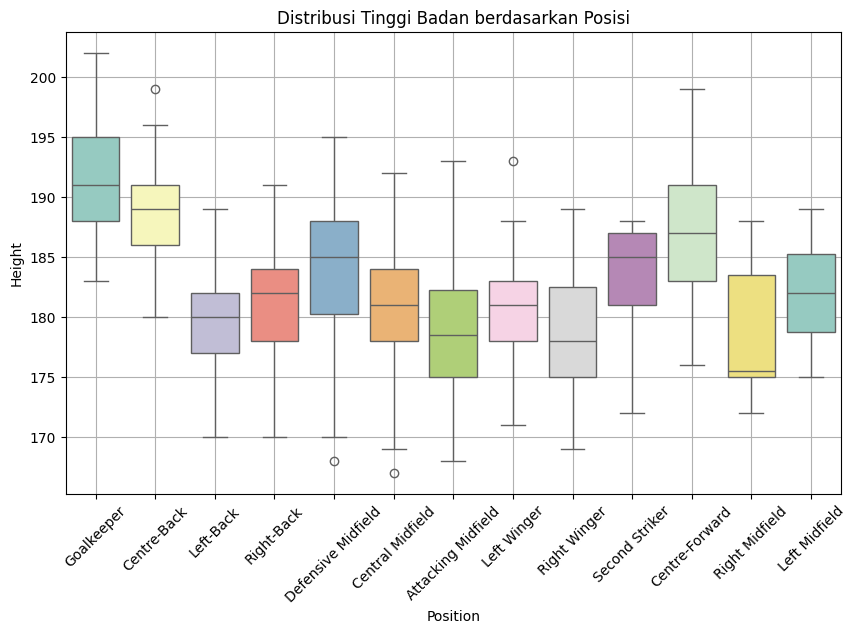

In [59]:
# Box plot:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Height', data=df, palette='Set3')
plt.title('Distribusi Tinggi Badan berdasarkan Posisi')
plt.xlabel('Position')
plt.ylabel('Height')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

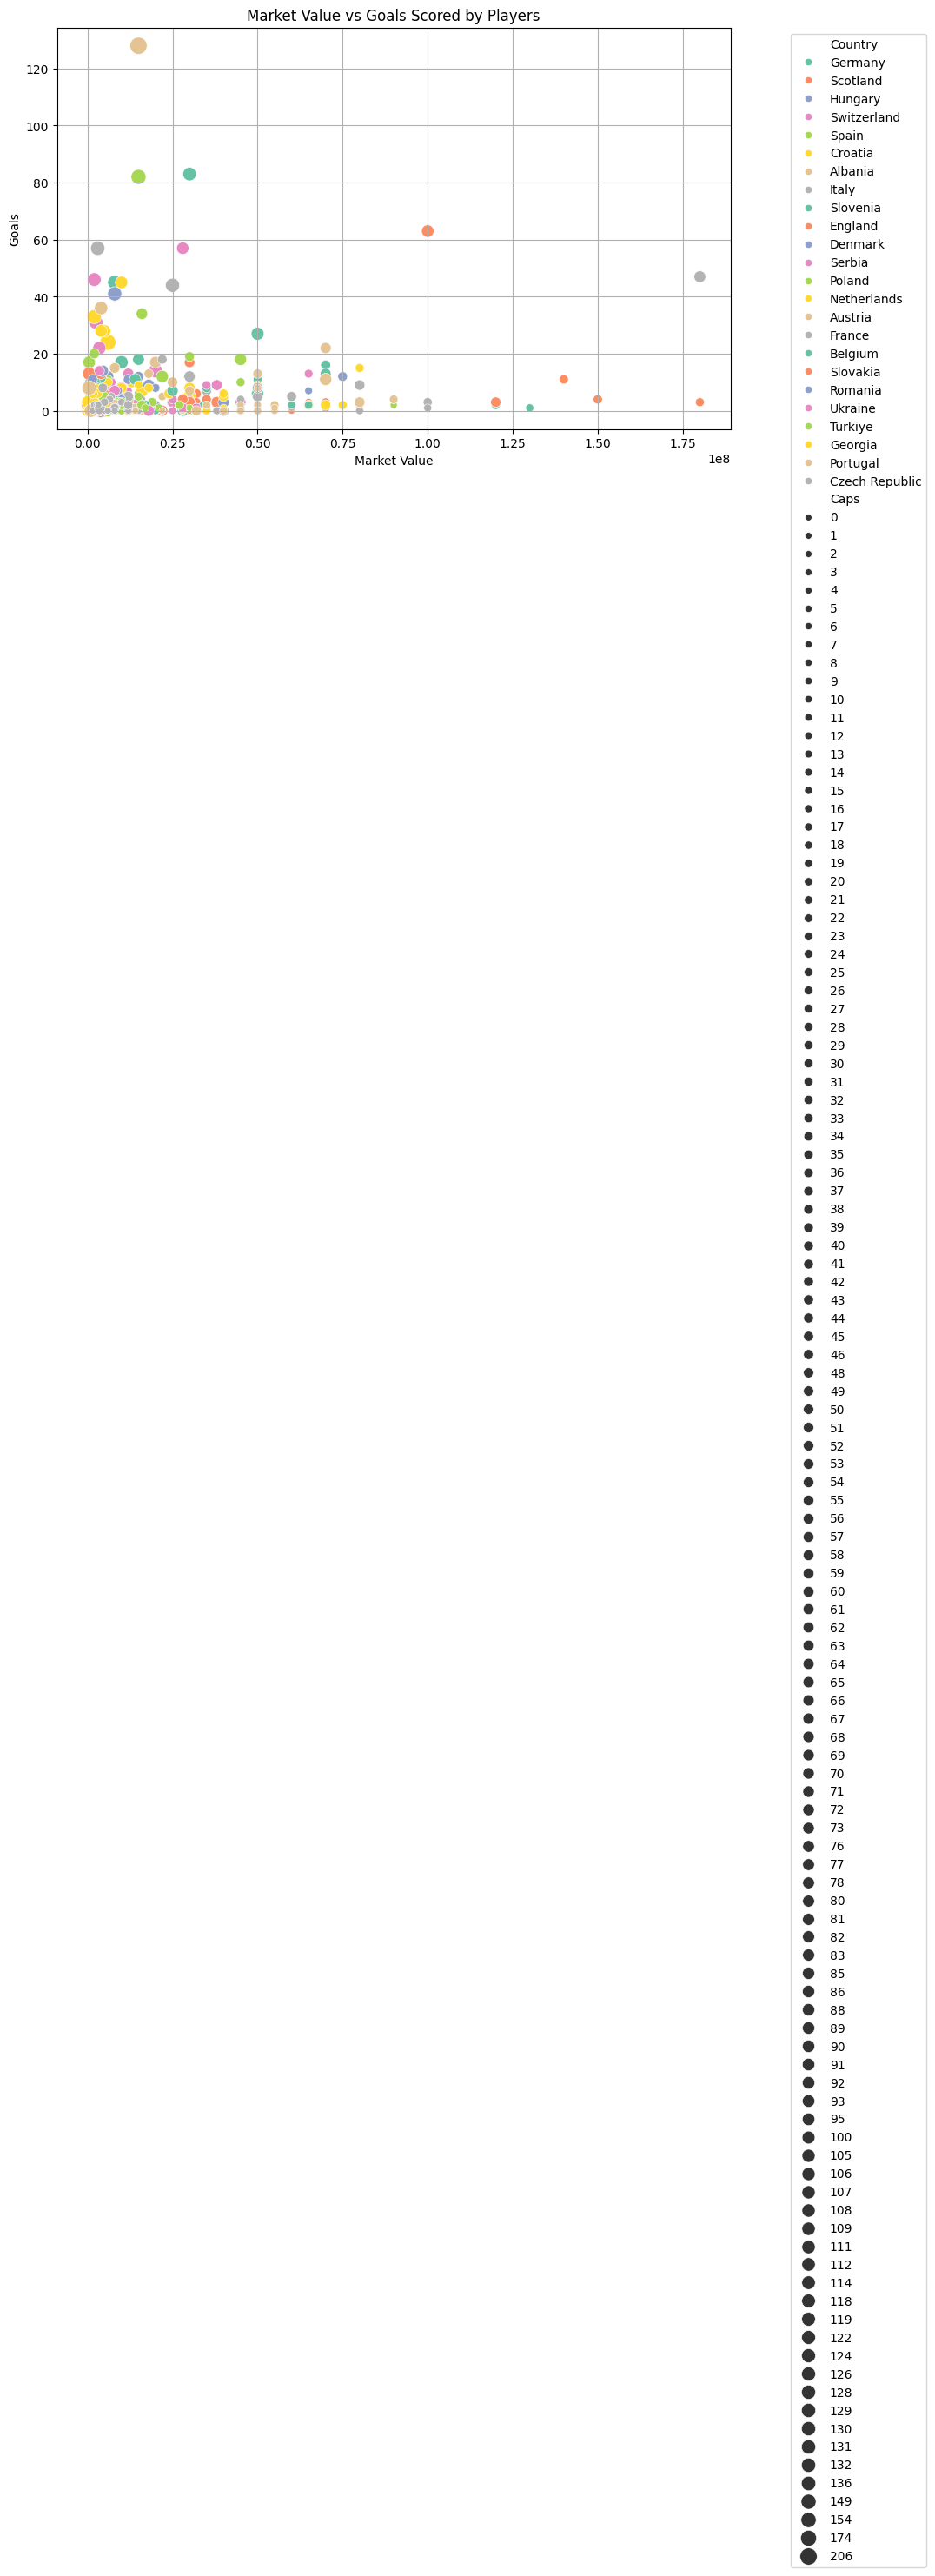

In [56]:
# Scatter plot:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarketValue', y='Goals', data=df, hue='Country', size='Caps', sizes=(30, 200), palette='Set2', legend='full')
plt.title('Market Value vs Goals Scored by Players')
plt.xlabel('Market Value')
plt.ylabel('Goals')
plt.grid(True)
plt.legend( loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

Average Caps for German Goalkeepers: 22.083333333333332


<Axes: ylabel='Frequency'>

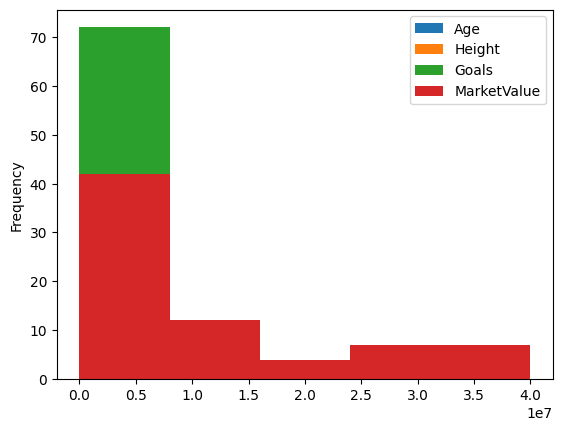

In [57]:
# Filter by Goalkeepers
goalkeepers = df[df["Position"] == "Goalkeeper"]

# Analyze experience (number of caps)
average_caps = goalkeepers["Caps"].mean()
print(f"Average Caps for German Goalkeepers: {average_caps}")

# Visualize experience using histograms
goalkeepers.plot.hist(bins=5, x="Caps")

(-0.5, 799.5, 399.5, -0.5)

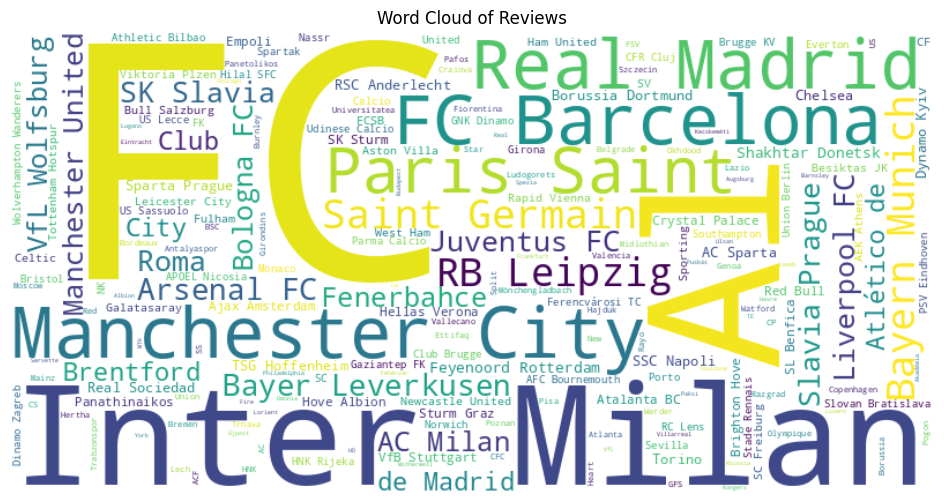

In [58]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['Club'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')